In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import time


plt.rcParams["figure.figsize"] = (10, 10)
# kill axis in rcParams
plt.rc('axes.spines',top=False,bottom=False,left=False,right=False);
plt.rc('axes',facecolor=(1,1,1,0),edgecolor=(1,1,1,0));
plt.rc(('xtick','ytick'),color=(1,1,1,0));

In [25]:

def get_image(path, mode=0, size=(640,480), show=False):
    img = cv2.imread(path,mode)
    if mode == 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    if img is None:
        print("Não foi possível abrir a imagem:", path)
    res = cv2.resize(img,size)
    
    if show:
        plt.figure(figsize=(10,10))
        plt.imshow(res)
        plt.show()
    return res

    
def otsu(img,block=81,offset=0.3):
    return cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,block,offset)

def adaptative_thresh(img,block=121,offset=0):
    return cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,block,offset)

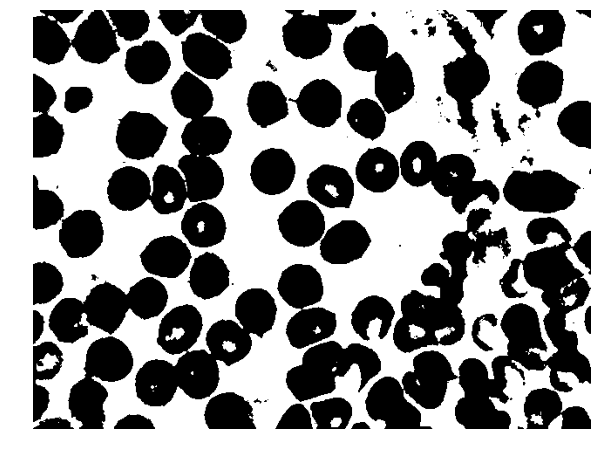

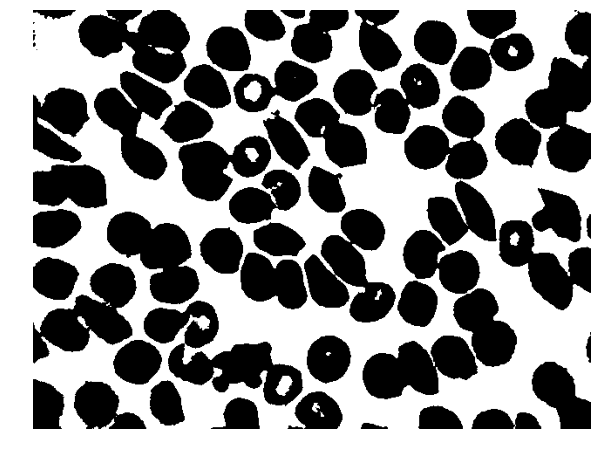

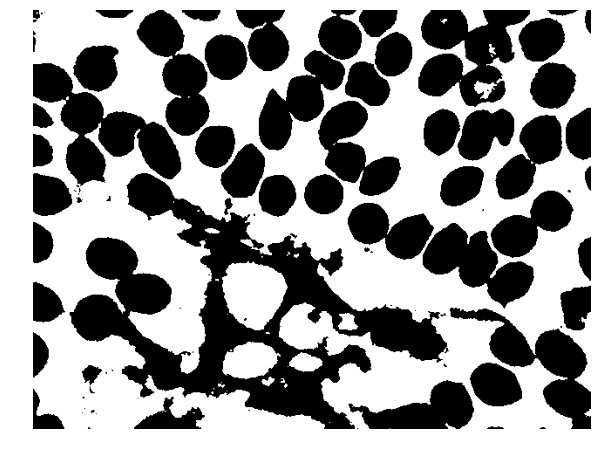

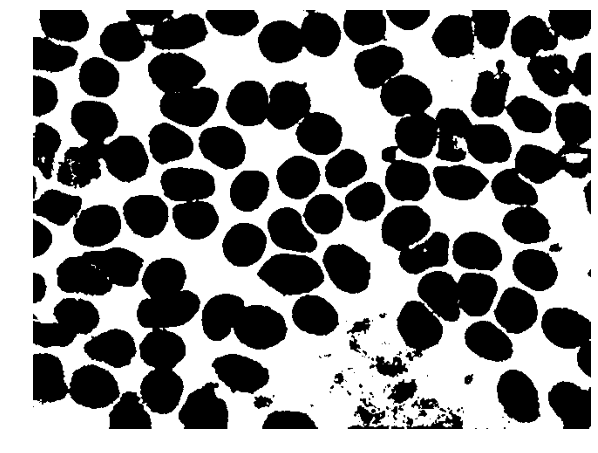

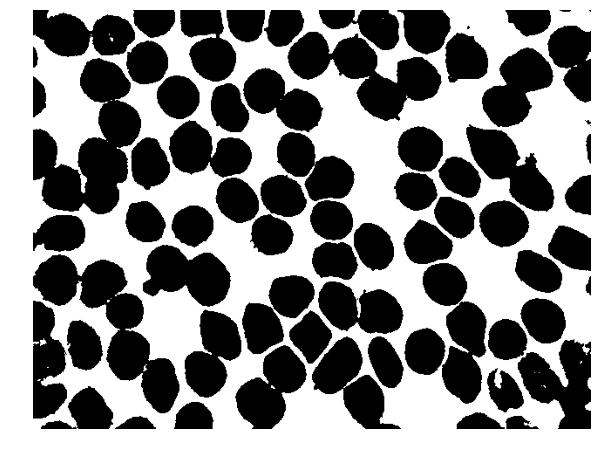

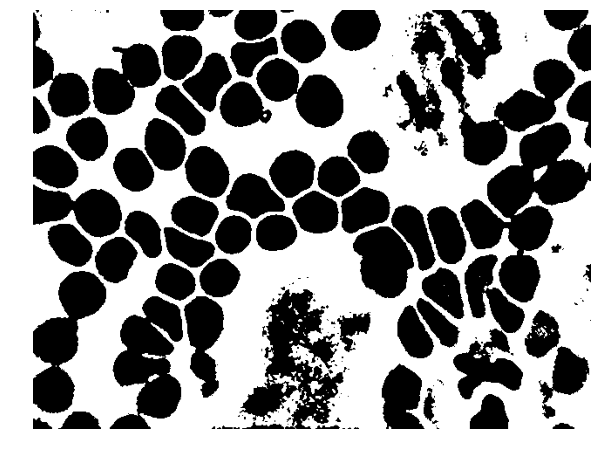

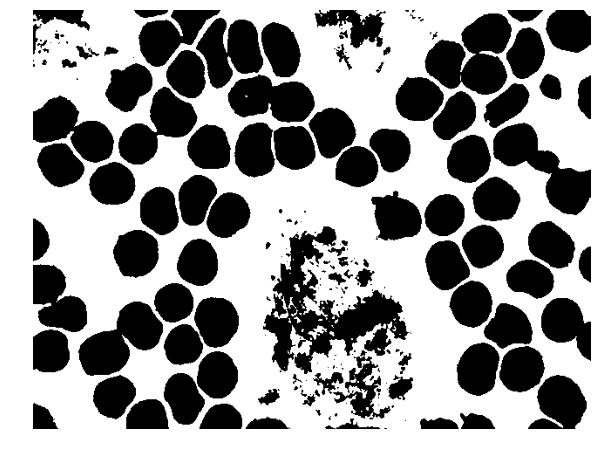

In [30]:
group = "normal"
gpath = "."
for i in range(1,16,1):
    path = gpath+"/samples/%s/blood_smear_%d.JPG" % (group,i)
    if os.path.exists(path):
        img = get_image(path)
        img = cv2.GaussianBlur(img,(5,5),0)
        mask = adaptative_thresh(img)
        plt.imshow(mask,cmap='gray')
        plt.show()
        cv2.imwrite(gpath+"/samples/%s_gts_font/gt_%i.png" % (group,i),mask)
        #plt.imsave(gpath+"/samples/%s_gts_font/gt_%i.png" % (group,i),mask,format='png')